# Tokenisation

In this lab you will be honing your regular expression skills to perform the key task of tokenisation. The aim of tokenisation is to separate the text into meaningful components that are useful for future analysis (e.g. counting or annotating). Often the most logical token is a "word" (e.g. for "bag-of-words" based methods), but deciding what constitutes a word is not straight-forward. At other times, punctuation should be maintained (e.g. for part of speech annotation). You will see that choosing the wrong tokenisation can impact follow-on analysis of the text.

You will be trying different tokenisers. Four texts are provided for testing the tokenisers: [tweet.txt](tweet.txt) - a single tweet for testing, [mumsnet.txt](mumsnet.txt) - a collection of mumsnet forum posts as collected in last week's lab, and [mirrormirror.txt](mirrormirror.txt) & [charliex.txt](charliex.txt) - short plot summaries of Star Trek episodes from Wikipedia. You are also welcome to collect and use your own data, utilising techniques from last week's lab. [tweet.txt](tweet.txt) will be used primarily below, but feel free to swap any text throughout to aid your understanding.

If you prefer, [tokeniser.py](tokeniser.py) provides skeleton code for what is presented below. It simply runs the tokenisation method provided in `tokenise(text)` over the text file provided on the command line, printing out the tokens 1 per line (as is standard for tokenisation), and a total count of tokens found. To run the tokeniser over a file simply run:

```
$ python3 tokeniser.py infile.txt
```

You can redirect the printed output to a file if you wish, simply add `> outfile.txt` to the end of the command.

Functions will be used in this lab to define regularly used code.

First to open a file, tokenise it with a provided tokeniser method, and return a list of tokens:

In [4]:
# takes file and tokeniser function, reads line by line, and returns list of tokens.
def tokenise_file(textfile, tokenise):
    with open(textfile, encoding="utf-8") as f:
        tokens = []
        lines = f.readlines()
        for line in lines:
            line_tokens = tokenise(line.strip())
            tokens.extend(line_tokens)
    return tokens

To print a list of tokens and the number of tokens present, and to a file:

In [7]:
def print_tokens(tokens):
    for token in tokens: #iterate tokens and print one per line.
        print(token)
    print(f"Total: {len(tokens)} tokens")

In [8]:
def save_tokens(tokens, outfile):
    with open(outfile, 'w', encoding="utf-8") as f:
        for token in tokens: #iterate tokens and output to file.
            f.write(token + '\n')
        f.write(f"Total: {len(tokens)} tokens")

and we'll definitely need the regular expressions package.

In [9]:
import re

In [10]:
# for reference
with open("tweet.txt", encoding="utf-8") as f:
    tweet = f.read()
print(tweet)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh


The simplest method of tokenisation is to just split the text on whitespace. The tokeniser below does just this, using Python's split function, simply on a space character.

In [11]:
def whitespace_tokenise(text):
    return text.split(" ")

In [12]:
#The whitespace_tokenise function has been defined, so can be passed as a callable object to the tokenise_file function.
tokens = tokenise_file("tweet.txt", whitespace_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we’re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach,
talking
to
students
about
#languages
and
language
careers!
Come
have
a
go
at
some
of
our
activities!
🌏#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 31 tokens


Observe the output, what potential issues can you observe? Are any characters missing from the original input? Can you improve it?

- **Optional:** Can you think of a better white space tokeniser, e.g. that splits on multiple spaces, or other white space characters using a regular expression?

- **Optional:** Can you come up with an alternative than using split, and instead using findall with a regular expression to do the same? (See simple tokeniser below)

Next we can try a very simple tokeniser that instead of finding the space between tokens, looks for patterns that match words. We use a basic regular expression for this.

In [13]:
def simple_match_tokenise(text):
    p = re.compile(r"[a-zA-Z]+")
    return p.findall(text)

In [14]:
tokens = tokenise_file("tweet.txt", simple_match_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
re
at
a
careers
event
in
Blackpool
Pleasure
Beach
talking
to
students
about
languages
and
language
careers
Come
have
a
go
at
some
of
our
activities
LoveLanguages
LoveLancaster
Lancaster
CI
https
t
co
vQQWdrUuqh
Total: 37 tokens


Again, observe the output. What potential issues do you see? Why do you have more tokens? Are any characters missing from the original input?
- **Optional**: Can you invert the function to use split instead?

The main task of this lab is to write your own tokeniser to list tokens useful for different purposes and different texts. You have a template for this in `custom_tokenise`. Here, a list of regular expression patterns are used to search for different types of tokens in turn, utilising *alternation* in one large compiled regular expression. You are provided with patterns for URLs, and simple words. Try this out on the tweet, the URLs should be tokenised separately.

In [17]:
def custom_tokenise(text):
    URL = '(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*' #this is one possible URL pattern, more complicated patterns that catch different URLs are possible.
    word = '\w+'
    patterns = (URL, word)
    joint_patterns = '|'.join(patterns) #the patterns are split with | for alternation.
    p = re.compile(r'(?:{})'.format(joint_patterns)) # format is used to build the pattern, surrounding with (?:...) for non-captured grouping for alternation.
    return p.findall(text)

In [18]:
tokens = tokenise_file("tweet.txt", custom_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
re
at
a
careers
event
in
Blackpool
Pleasure_Beach
talking
to
students
about
languages
and
language
careers
Come
have
a
go
at
some
of
our
activities
LoveLanguages
LoveLancaster
Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 32 tokens


A point to be aware of here is the ordering of the pattern sequence. Regular expressions in Python (and most other languages) process alternation options in order (left to right). This means a longer match (i.e. greedy) may be ignored if an earlier option leads to a successful match (regular expression finds will not overlap). It is therefore important to consider the order of the regular expressions, as a more general pattern may match some text before a more specific pattern has chance to see it. You can see this in action by swapping the URL and word patterns (`patterns = (word,URL)`) and tokenising the tweet again, now the URL will not be tokenised separately as the word pattern hits first and consumes the start of the URLs.

In order to aid understanding, a tokeniser is provided below specialised for the tokenising the [mirrormirror.txt](mirrormirror.txt). Here the following tokenisation rules have been applied:
- all punctuation is separated as individual tokens
- titles and initials are single tokens (e.g. `Dr.` and `T.`)
- hyphenated words are a single token (e.g. `mirror-universe`
- cases of possessive s (`'s`) are separated, e.g. `Kirk` & `'s` are separate tokens.

In [56]:
import string
def custom_tokenise_mirror(text):
    title = "[A-Z][a-z]?\."
    word = "[-\w]+"
    apos = "\'[a-z]*"
    other_chars = "[^\w\s]"
    leftover = "\S+" #Having a final catch all of "non-white-space" will pick up anything not explicity looked for earlier.
    patterns = (title, apos, other_chars, word, leftover) #leftover not actually needed here, as all caught in other chars.
    joint_patterns = '|'.join(patterns)
    p = re.compile(r'(?:{})'.format(joint_patterns))
    
    result = p.findall(text)
    
    result = [x for x in result if x not in string.punctuation]
            
    return result

In [58]:
tokens = tokenise_file("mirrormirror.txt", custom_tokenise_mirror)
print(tokens)
save_tokens(tokens,"mirrormirror_tok.txt")

['After', 'failing', 'to', 'persuade', 'the', 'Halkan', 'Council', 'to', 'allow', 'the', 'Federation', 'to', 'mine', 'dilithium', 'crystals', 'on', 'their', 'planet', 'Captain', 'James', 'T.', 'Kirk', 'along', 'with', 'Chief', 'Medical', 'Officer', 'Dr.', 'McCoy', 'Chief', 'Engineer', 'Scott', 'and', 'Communications', 'Officer', 'Uhura', 'attempt', 'to', 'beam', 'back', 'to', 'the', 'Enterprise', 'during', 'an', 'ion', 'storm', 'and', 'find', 'themselves', 'on', 'an', 'Enterprise', 'that', 'has', 'drastically', 'changed', 'First', 'Officer', 'Spock', 'now', 'has', 'a', 'mustache', 'and', 'goatee', 'uniforms', 'are', 'more', 'revealing', 'sidearms', 'are', 'standard', 'issue', 'as', 'well', 'as', 'daggers', 'for', 'officers', 'and', 'the', 'Federation', 'has', 'become', 'an', 'Empire', 'After', 'inquiring', 'about', 'the', 'status', 'of', 'the', 'misssion', 'Spock', 'orders', 'the', 'bridge', 'crew', 'to', 'prepare', 'a', 'phaser', 'barrage', 'on', 'the', 'Halkans', 'for', 'their', 'ref

Observe the output in [mirrormirror_tok.txt](mirrormirror_tok.txt). Check you understand which patterns are catching which tokens.

Can you edit the tokeniser so that punctuation tokens aren't included, but the tokens above (titles and initials) with punctuation are still present?

**Advanced**: Try running your tokeniser on [charliex.txt](charliex.txt) too. This is very similar to mirrormirror.txt, but it also contains contractions (e.g. `don't`). How are these dealt with by the above tokeniser? Ideally, `n't` should be a separate token, to represent `not`. Consider me impressed if you can achieve this in your tokeniser (without breaking other parts), especially if you can do it without adding pre- or post-processing. Let Alistair know if you manage this, or if you would like a hint.

All NLP toolkits, and many NLP tools themselves have built in tokenisers. [NLTK](http://www.nltk.org) is one of the best known ones and has a specialsed tokeniser for online text, and specifically Twitter data. Running the tokenisers is straight-forward, with methods provided below, `nltk_tokenise`: default, and `nltk_twitter_tokenise`: for Twitter. Note the "Twitter" tokeniser will be applicable to other online text too, e.g. forum data. Run these tokenisers over the texts and compare the results.

In [59]:
import nltk
nltk.download('punkt') #download tokeniser models, will download first time, and find on second run. You can remove this line once installed

[nltk_data] Downloading package punkt to /home/jay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
def nltk_tokenise(text):
    return nltk.word_tokenize(text)

In [61]:
def nltk_twitter_tokenise(text):
    twtok = nltk.tokenize.TweetTokenizer()
    return twtok.tokenize(text)

In [62]:
tokens = tokenise_file("tweet.txt", nltk_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
’
re
at
a
#
careers
event
in
#
Blackpool
@
Pleasure_Beach
,
talking
to
students
about
#
languages
and
language
careers
!
Come
have
a
go
at
some
of
our
activities
!
🌏
#
LoveLanguages
#
LoveLancaster
@
Lancaster_CI
https
:
//t.co/vQQWdrUuqh
Total: 46 tokens


In [63]:
tokens = tokenise_file("tweet.txt", nltk_twitter_tokenise)
print(tweet)
print()
print_tokens(tokens)

This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh

This
week
we
’
re
at
a
#careers
event
in
#Blackpool
@Pleasure_Beach
,
talking
to
students
about
#languages
and
language
careers
!
Come
have
a
go
at
some
of
our
activities
!
🌏
#LoveLanguages
#LoveLancaster
@Lancaster_CI
https://t.co/vQQWdrUuqh
Total: 37 tokens


What is dealt with better by NLTK? Any issues that you were able to overcome with a manual tokeniser?

More customisation. NLTK is quicker. 

## Frequency analysis
Once we have text tokenised we can start to count words, and do some analysis. We will start in earnest with this next week. For now, we will do a simple counting of tokens and producing a frequency list and plot.

The `frequency_analysis` method takes a list of tokens (outputted from the various tokenise methods) and counts the frequency of each token. The list of tokens is printed alongside the frequency of each, in descending frequency order. A frequency plot is also produced, with the top 20 tokens as default.

Examining the frequency list (and token streams) can help to find common tokenisation issues.

You can try this on different texts. Increase the number of items in the plot, given enough text you should start to see a nice [Zipfian curve](https://en.wikipedia.org/wiki/Zipf\%27s_law). Try `cumulative=True`.

In [64]:
%matplotlib inline

def frequency_analysis(tokens):
    freq = nltk.FreqDist(tokens)
    for key,val in freq.most_common(20):
        print(key,val,sep="\t")

    freq.plot(20, cumulative=False)

the	55
to	39
Kirk	33
and	33
Spock	20
a	16
that	14
of	14
's	12
his	12
their	11
Scott	10
for	10
in	10
transporter	9
is	9
McCoy	8
Uhura	8
has	8
he	8


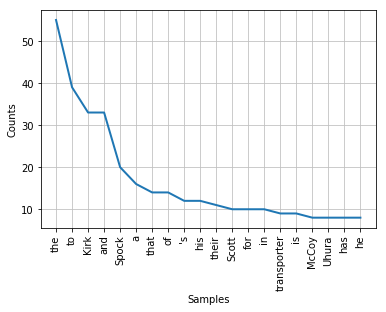

In [65]:
tokens = tokenise_file("mirrormirror.txt", custom_tokenise_mirror)
frequency_analysis(tokens)

## Exercise

Build a tokeniser for the mumsnet forum data ([mumsnet.txt](mumsnet.txt) (feel free to use your own collected data too) by building on the `custom_tokenise` method. Tokenise the text with the following rules:
- all punctuation separated as individual tokens, unless sequences of punctuation (e.g. `!!!`), which should be combined to a single token.
- URLs, hashtags, and mentions as separate tokens
- hyphenated words as a single token
- words with apostrophes to mark concatenation and possessive s should be a single token (e.g. `don't`, `I'm` and `1940's`)
- **Advanced/Extra**: Emoticons separated as separate tokens (e.g. `:-)`)
- **Advanced/Extra**: You will find other sequences in the text that should be single tokens, deal with as many of these as possible for as clean a tokenisation as possible ready for creating a frequency list.

You may want to consider pre-processing (i.e. cleaning/normalising) the text to make tokenisation easier.

In [139]:
def custom_tokenise_forum(text):
    
    #words with apostrophes to mark concatenation and possessive s should be a single token (e.g. don't, I'm and 1940's)
    result = re.findall(r"[\w']+|[.,!?;-]", text)
    
    #idx = result.index("-")
    
    
    return result

In [140]:
li = ['dd-','-','tt']
tt = li.index('-')
if '-' in li:
    print(tt)

1


['My', 'best', 'friend', 'has', 'a', '6', 'month', 'old', 'and', 'after', '14', 'years', 'of', 'her', 'gleefully', 'finding', 'the', 'biggest', 'most', 'annoying', 'toys', 'she', 'could', 'for', 'my', 'children', 'I', 'am', 'desperate', 'to', 'get', 'my', 'own', 'back', '.', 'What', 'are', 'the', 'current', 'most', 'ear', 'shattering', 'noisy', 'toys', 'preferably', 'plastic', 'with', 'flashing', 'lights', 'that', 'you', 'can', 'buy', 'now', '.', 'I', 'remember', 'vtech', 'baby', 'walkers', 'were', 'pretty', 'appalling', 'when', 'mine', 'were', 'small', '.', 'Following', 'with', 'interest', ',', "I'm", 'in', 'a', 'similar', 'situation', 'Might', 'just', 'be', 'us', 'Sjjr23', "I'm", 'thinking', 'the', 'pink', 'vtech', 'walker', 'looks', 'horrific', 'so', 'might', 'go', 'for', 'that', "I'm", 'bumping', 'this', 'as', 'I', 'refuse', 'to', 'believe', 'we', 'are', 'the', 'only', '2', 'vengeful', 'people', 'on', 'here', 'My', '18', 'month', 'is', 'currently', 'playing', 'on', 'her', 'Vtech', 

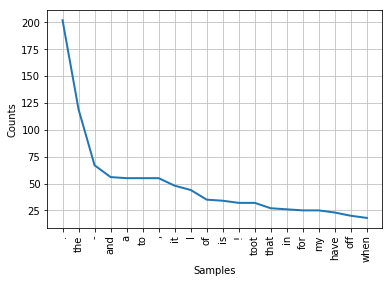

In [141]:
tokens = tokenise_file("mumsnet.txt", custom_tokenise_forum)
print(tokens)
save_tokens(tokens,"mumsnet_tok.txt")
frequency_analysis(tokens)

### note any findings or decisions made here:

